In [105]:
# OS/ User specific 
import os
# DATASET_PATH = "/home/jcharlet/workspace/datascience/machine_learning_notes/data/"
DATASET_PATH = "/opt/dataiku-dss/config/ipython_notebooks/JCKAGGLEHOUSEPRICES/data/" 
# DATASET_PATH = os.path.abspath(os.path.join( os.getcwd() , 'data')) + r'\'

### Kaggle project - Table of Contents
* 1 - Define the problem
* [Load data and displaying info](#load-data)
* 2 - Prepare Data
    * Identify features
        * Separate numerical from categorical features
        * Separate nominal and ordinal (from categorical features)
    * Clean data
        * Remove numerical features with missing values
        * Remove categorical features with missing values
        * drop outliers in numerical values # WIP
    * transform # TODO
        * transform categorical values #TODO
* 2 - Feature selection #WIP
    * Select features using random forest classifier #WIP
    
* 3 - Spot Check Algorithms
    * split dataset
    * train on multiple algorithms  # WIP
    
    
## 7/8: next step is to work on categorical data

# Define the problem

From project https://www.kaggle.com/c/house-prices-advanced-regression-techniques

- Step 1: What is the problem? 

house prices are hard to predict, we want to know how much my beautiful flat is worth on the market in the USA

- Step 2: Why does the problem need to be solved? 

MONEY MONEY
and especially we need to learn Machine Learning

- Step 3: How would I solve the problem? 

housing agents do statistical studies.

Data pre-processing is very important. We have a lot of features, dirty data (missing values), numerical/ordinal/nominal values.

We'll follow the process from https://machinelearningmastery.com/process-for-working-through-machine-learning-problems/

- 1 - Define the Problem
- 2 - Prepare Data
- 3 - Spot Check Algorithms
- 4 - Improve Results
- 5 - Present Results

# Load data <a class="anchor" id="load-data"></a>

In [103]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Imputer

import matplotlib.pyplot as plt

In [106]:
df = pd.read_csv(DATASET_PATH + "train.csv")
df_test = pd.read_csv(DATASET_PATH + "test.csv")


In [82]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

# Prepare data <a class="anchor" id="clean-data"></a>
## Identify features
### Separate numerical from categorical features

In [83]:
# Separating data features according to data type: numeric or string

X_numeric_labels = set(df._get_numeric_data().columns.tolist())
X_categorical_labels = set(df.columns.tolist()).difference(X_numeric_labels)

In [84]:
print('These are numerical features {} \n'.format(X_numeric_labels))
print('These are categorical features {} \n'.format(X_categorical_labels))


These are numerical features {'GarageYrBlt', 'MiscVal', 'MasVnrArea', 'BedroomAbvGr', 'LotArea', 'OverallQual', 'HalfBath', 'Fireplaces', 'LotFrontage', 'GrLivArea', 'TotRmsAbvGrd', 'BsmtFinSF2', 'BsmtUnfSF', 'GarageCars', 'WoodDeckSF', 'BsmtFinSF1', 'Id', '1stFlrSF', 'BsmtHalfBath', 'EnclosedPorch', 'ScreenPorch', 'YearRemodAdd', 'PoolArea', 'YrSold', 'SalePrice', 'KitchenAbvGr', 'OpenPorchSF', 'BsmtFullBath', '2ndFlrSF', 'OverallCond', 'YearBuilt', 'TotalBsmtSF', 'GarageArea', 'FullBath', '3SsnPorch', 'MSSubClass', 'MoSold', 'LowQualFinSF'} 

These are categorical features {'BsmtCond', 'Electrical', 'Utilities', 'PavedDrive', 'Exterior2nd', 'ExterQual', 'GarageCond', 'Neighborhood', 'GarageType', 'Heating', 'LandContour', 'MiscFeature', 'LotShape', 'BsmtFinType2', 'BldgType', 'Foundation', 'SaleType', 'Fence', 'Street', 'GarageFinish', 'MasVnrType', 'BsmtQual', 'LandSlope', 'RoofStyle', 'FireplaceQu', 'SaleCondition', 'HeatingQC', 'MSZoning', 'LotConfig', 'BsmtExposure', 'KitchenQual

### Separate nominal and ordinal (from categorical features)

In [85]:
# Separating categorical features in two sets: nominal and ordinal
# The values in features asociated with categorical ordinal feautures are: [Ex, Gd, GLQ, GdPrv, Fin] ... etc

categorical_ordinal_list_values = ['Ex', 'Gd', 'GLQ', 'GdPrv', 'Fin'] # There are not all of the values. Here must be
# included all the possible values for the categorical ordinal features

X_categorical_nominal_labels = (df[list(X_categorical_labels)].drop(categorical_missing_values_labels,
        1).isin(categorical_ordinal_list_values) == False).all().loc[lambda df: df.values == True].axes

# The previous instruction returns the index of the categorical_nominal_values. I think we could include the following features:
#LandSlope has values: Gtl -> Gentle slopen; Mod -> Moderate Slope; Sev -> Severe Slope
#Functional has values: Typ -> Typical Functionality; Min1 -> Minor Deductions 1; Min2 -> Minor Deductions 2; Mod -> Moderate Deductions; Maj1 -> Major Deductions 1; Maj2 -> Major Deductions 2; Sev -> Severely Damaged; Sal -> Salvage only
#PavedDrive has values:   Y -> Paved ; P -> Partial Pavement; N -> Dirt/Gravel



In [86]:
print(X_categorical_nominal_labels)
print()
print(X_categorical_nominal_labels[0].tolist())

[Index(['Utilities', 'PavedDrive', 'Exterior2nd', 'Neighborhood', 'Heating',
       'LandContour', 'LotShape', 'BldgType', 'Foundation', 'SaleType',
       'Street', 'LandSlope', 'RoofStyle', 'SaleCondition', 'MSZoning',
       'LotConfig', 'Exterior1st', 'Condition1', 'HouseStyle', 'CentralAir',
       'RoofMatl', 'Condition2', 'Functional'],
      dtype='object')]

['Utilities', 'PavedDrive', 'Exterior2nd', 'Neighborhood', 'Heating', 'LandContour', 'LotShape', 'BldgType', 'Foundation', 'SaleType', 'Street', 'LandSlope', 'RoofStyle', 'SaleCondition', 'MSZoning', 'LotConfig', 'Exterior1st', 'Condition1', 'HouseStyle', 'CentralAir', 'RoofMatl', 'Condition2', 'Functional']


### Remarks
<p> From the set of set of **X_categorical_labels** the set of **X_categorical_nominal_labels** is extracted to get 
the set of **X_categorical_ordinal_labels**</p>

* On the set of **X_categorical_ordinal_labels** we can apply pag 104 **mapping strategy**

* On the set of **X_categorical_nominal_labels** we can apply **one-hot encoding strategy** pag 106

In [87]:
X_categorical_ordinal_labels = set(X_categorical_labels).difference(set(X_categorical_nominal_labels[0].tolist()))

In [88]:
# print(X_categorical_labels)

In [89]:
# df[list(X_categorical_ordinal_labels)]

## Clean data

#### Some considerations


* <p> Page 107 of "our book":  "After executing the preceding code, the first column of the NumPy array X now holds the new
colour values, which are encoded as follows:
blue to 0
green to 1
red to 2
If we stop at this point and feed the array to our classifier, *we will make one of the most common 
mistakes in dealing with categorical data*. Can you spot the problem? *
Although the colour values do not come in any particular order, a learning algorithm will now assume
that green is larger than blue, and red is larger than green. 
Although this assumption is incorrect, the algorithm could still produce useful results. 
However, those results would not be optimal* "</p>

* <p> In the numerical feature variables there is the possibility that there are categorical numerical features variables. How to identify this kinf of features ? 
 I think the main problem is what strategy to use to replace values ? median, mode or mean ? </p>
 

In [90]:
df_cleaned=df.copy()

### Remove categorical features with missing values

In [91]:
# we are dropping any categorical feature with at least one null value, we can relax this requirement by changing df > 0 to 
# df > n with n > 0

categorical_missing_values_labels = \
        df[list(X_categorical_labels)].isnull().sum().loc[lambda df: df > 0].index.tolist()

print(categorical_missing_values_labels)

print(" Number of Total Categorical Values = {} \n Number of Categorical Missing Values = {}  \n Difference = {}"\
      .format(len(X_categorical_labels), len(categorical_missing_values_labels), \
              len(X_categorical_labels)- len(categorical_missing_values_labels) ))

df_cleaned.drop(categorical_missing_values_labels, 1,inplace=True)

['BsmtCond', 'Electrical', 'GarageCond', 'GarageType', 'MiscFeature', 'BsmtFinType2', 'Fence', 'GarageFinish', 'MasVnrType', 'BsmtQual', 'FireplaceQu', 'BsmtExposure', 'Alley', 'PoolQC', 'BsmtFinType1', 'GarageQual']
 Number of Total Categorical Values = 43 
 Number of Categorical Missing Values = 16  
 Difference = 27


### Remove numerical features with missing values

In [92]:
df_cleaned= df_cleaned._get_numeric_data().drop(['Id'],1)
X_numerical_missing_values_labels=df_cleaned[df_cleaned._get_numeric_data().columns.tolist()].isnull().sum()\
                    .loc[lambda df: df.values > 0].index.tolist()
    

print(" Number of Total Numerical Values = {} \n Number of Numerical Missing Values = {}  \n Difference = {}"\
      .format(len(X_numeric_labels), len(X_numerical_missing_values_labels), \
              len(X_numeric_labels)- len(X_numerical_missing_values_labels) ))


df_cleaned.drop(X_numerical_missing_values_labels, 1,inplace=True)

 Number of Total Numerical Values = 38 
 Number of Numerical Missing Values = 3  
 Difference = 35


In [93]:
# print(X_numerical_missing_values_labels)
# print(categorical_missing_values_labels)
# df_cleaned.columns.values

### Drop outliers in numerical values # WIP

In [94]:
# def drop_outliers(df, field_name):
#     distance = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
#     df.drop(df[df[field_name] > distance + np.percentile(df[field_name], 75)].index, inplace=True)
#     df.drop(df[df[field_name] < np.percentile(df[field_name], 25) - distance].index, inplace=True)

# # drop_outliers(df_cleaned, 'LotArea')    
# df_cleaned_no_outlier = df.copy()
# for feature in X_numerical_not_missing_values_labels:
#     drop_outliers(df_cleaned_no_outlier, feature)    

In [95]:
# print("nb of rows with outliers:{}, without: {}".format(df.shape[0],df_cleaned_no_outlier.shape[0]))


nb of rows with outliers:1460, without: 584


We are currently removing far too many items.

attempt above was removing values using univariate method: unsatisfying: we remove a third of the dataset, we should rather use filters here if we really want to deal with outliers on 1 dimension

but a much better way would be to find outliers in the whole dataset on all dimensions using multivariate method. We would then remove those outliers from the training set to improve accuracy

see http://scikit-learn.org/stable/modules/outlier_detection.html
http://scikit-learn.org/stable/auto_examples/covariance/plot_outlier_detection.html

# Feature Selection

In [96]:
# feature_columns=filter(lambda x: x !="SalePrice" and x!="Id", df.columns)
# feature_numerical_columns = df[feature_columns].select_dtypes(include=[np.number]).columns.tolist()
feature_numerical_columns=X_numerical_not_missing_values_labels
prediction_column="SalePrice"
# # print(feature_columns)
X = df[feature_numerical_columns]
Y=df[[prediction_column]];

In [97]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier();
model = model.fit(X, Y)    
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("label {} : {}".format(feature_numerical_columns[f],importances[indices[f]]))
# print(indices)

# plt.bar(range(X.shape[1]),importances[indices],align='center')
# plt.xticks(range(X.shape[1]),feature_numerical_columns,rotation=90);
# plt.rcParams["figure.figsize"] = (17,5)


label MSSubClass : 0.10630084945219868
label LotArea : 0.057419442174668975
label OverallQual : 0.05648865577820874
label OverallCond : 0.0557373821829778
label YearBuilt : 0.05497467756810896
label YearRemodAdd : 0.05370985687355734
label BsmtFinSF1 : 0.05311447057092913
label BsmtFinSF2 : 0.04958933782922058
label BsmtUnfSF : 0.04955799099489236
label TotalBsmtSF : 0.045816711763436
label 1stFlrSF : 0.04316719210909622
label 2ndFlrSF : 0.03782533593199823
label LowQualFinSF : 0.037310204913633294
label GrLivArea : 0.03381095651910322
label BsmtFullBath : 0.0293061378190071
label BsmtHalfBath : 0.027581236115954883
label FullBath : 0.025544547312649424
label HalfBath : 0.021876949083578227
label BedroomAbvGr : 0.019843871531554598
label KitchenAbvGr : 0.019239656298875286
label TotRmsAbvGrd : 0.017081697376602468
label Fireplaces : 0.014956716850152017
label GarageCars : 0.01362845032227814
label GarageArea : 0.012163217080534887
label WoodDeckSF : 0.011675551998970841
label OpenPorch

To draw graph and select features

# Spot Check Algorithms
## Split dataset

In [110]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [111]:
from sklearn.model_selection import train_test_split

X = df[X_numerical_not_missing_values_labels]
Y=df[["SalePrice"]];
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=42)
print(Y_train.head())
X_train.head()

      SalePrice
615      137500
613      147000
1303     232000
486      156000
561      170000


,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
615,85,8800,6,7,1963,1963,763,0,173,936,...,120,0,0,0,0,0,0,5,2010,137500
613,20,8402,5,5,2007,2007,206,0,914,1120,...,0,30,0,0,0,0,0,12,2007,147000
1303,20,8688,7,5,2005,2005,0,0,1616,1616,...,208,59,0,0,0,0,0,4,2006,232000
486,20,10289,5,7,1965,1965,836,0,237,1073,...,0,0,0,0,0,0,0,6,2007,156000
561,20,10010,5,5,1974,1975,1071,123,195,1389,...,240,38,0,0,0,0,0,4,2006,170000


## Train on multiple models

In [99]:

#training
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier 

from sklearn.metrics import mean_squared_log_error
from sklearn import preprocessing

models = []
models.append(("SVC",SVC()))
models.append(("LinearSVC",LinearSVC()))
models.append(("KNeighbors",KNeighborsClassifier()))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("RandomForest",RandomForestClassifier()))

modelsWhichNeedNormalization = []
modelsWhichNeedNormalization.append(("LogisticRegression",LogisticRegression()))
modelsWhichNeedNormalization.append(("MLPClassifier",MLPClassifier(solver='lbfgs', random_state=0)))
modelsWhichNeedNormalization.append(("LinearRegression", LinearRegression()))
# models

In [127]:
print("5 expected values: {}\n".format(Y_test[0:5].values))
containers=[]
for name,model in models:
#     Train the model using the training sets
    model.fit(X_train, Y_train)

    # Make predictions using the testing set
    y_pre = model.predict(X_test)
    mean_squared_log_err= mean_squared_log_error(Y_test, y_pre)
    print("Training on {}\n   mean squared log error: {}\n".format(name,mean_squared_log_err))
    print("   5 predicted values: {}\n".format(y_pre[0:5]))
    containers.append([name,model,y_pre,mean_squared_log_err])

5 expected values: [[154500]
 [325000]
 [115000]
 [159000]
 [315500]]

Training on SVC
   mean squared log error: 0.1979351767720077

   5 predicted values: [140000 140000 140000 140000 140000]

Training on LinearSVC
   mean squared log error: 1.1981167182235641

   5 predicted values: [60000 60000 60000 60000 60000]

Training on KNeighbors
   mean squared log error: 0.0013517972574133067

   5 predicted values: [155000 324000 115000 157000 318000]

Training on DecisionTree
   mean squared log error: 0.004929683188873606

   5 predicted values: [154000 325000 113000 159500 318000]

Training on RandomForest
   mean squared log error: 0.06611855159386737

   5 predicted values: [149000 207500  76000 160000 272000]



In [128]:
print("5 expected values: {}\n".format(Y_test[0:5].values))
for name,model in modelsWhichNeedNormalization:
#     Train the model using the training sets
    X_train_scaled = preprocessing.scale(X_train)
    model.fit(X_train_scaled, Y_train)

    # Make predictions using the testing set
    X_test_scaled = preprocessing.scale(X_test)
    y_pre = model.predict(X_test_scaled)
    
    mean_squared_log_err= mean_squared_log_error(Y_test, y_pre)
    print("Training on {}\n   mean squared log error: {}\n".format(name,mean_squared_log_err))
    print("   5 predicted values: {}\n".format(y_pre[0:5]))
    containers.append([name,model,y_pre,mean_squared_log_err])

# crash on Jeremie's laptop

5 expected values: [[154500]
 [325000]
 [115000]
 [159000]
 [315500]]

Training on LogisticRegression
   mean squared log error: 0.07373474880290908

   5 predicted values: [145000 260000 110000 239000 385000]

Training on MLPClassifier
   mean squared log error: 0.054286516265507984

   5 predicted values: [135000 412500  93000 239000 385000]

Training on LinearRegression
   mean squared log error: 0.0034970452468143513

   5 predicted values: [[157814.46831387]
 [309217.04534995]
 [122723.27223142]
 [161769.41225989]
 [300857.72026585]]



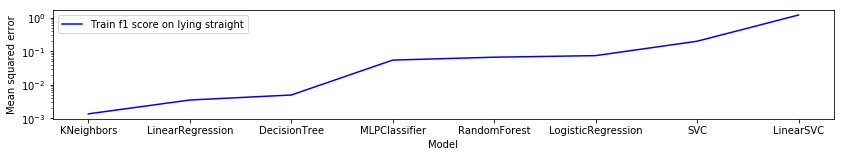

In [216]:
def displayErrGraphOnAllAlgorithms(containers):
    plt.rcParams["figure.figsize"] = (14,2)
    from matplotlib.legend_handler import HandlerLine2D

    names=[(lambda row: row[0])(row) for row in containers]
    mean_squared_log_errs=[(lambda row: row[3])(row) for row in containers]

    errs_df=pd.DataFrame(data=mean_squared_log_errs,columns=["err"])
    errs_df["name"]=names
    errs_df.sort_values(by="err",inplace=True)

    line1, = plt.plot(errs_df["name"],errs_df["err"], 'b', label='Train f1 score on lying straight')
    plt.legend(handler_map={line1: HandlerLine2D(numpoints=1)})
    plt.ylabel('Mean squared error')
    plt.xlabel('Model')
    plt.yscale("log")

    plt.show()
displayErrGraphOnAllAlgorithms(containers)

In [222]:
def displayGraphTrueVsPred(name,y_pre,Y_test):
    plt.rcParams["figure.figsize"] = (7,7)

    preds_df=pd.DataFrame(data=y_pre,columns=["predictions"])
    preds_df["true values"]=Y_test.SalePrice.values

    print("Model: {}".format(name))

    plt.plot(preds_df["predictions"], preds_df["true values"],'bo')
    plt.plot([0,700000], [0,700000])
    # line1, = plt.plot(y_pre, Y_test, 'b', label='predictions')
    # plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
    # plt.ylabel('Sales price')
    plt.xlabel('Predictions')
    plt.ylabel('true values')
    # plt.yscale("log")

    plt.show()
    

Model: LinearRegression


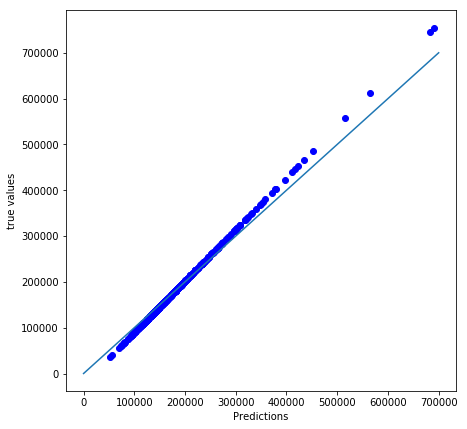

Model: KNeighbors


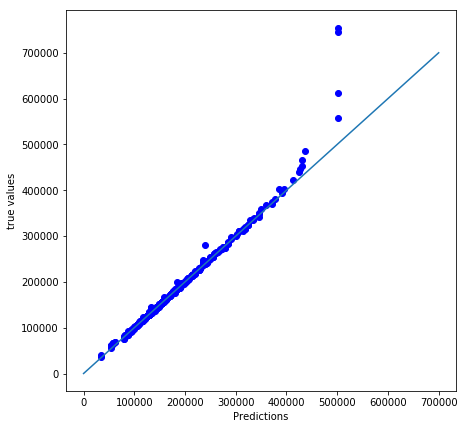

In [223]:

displayGraphTrueVsPred(containers[7][0],containers[7][2],Y_test)
displayGraphTrueVsPred(containers[2][0],containers[2][2],Y_test)

Model: LinearRegression


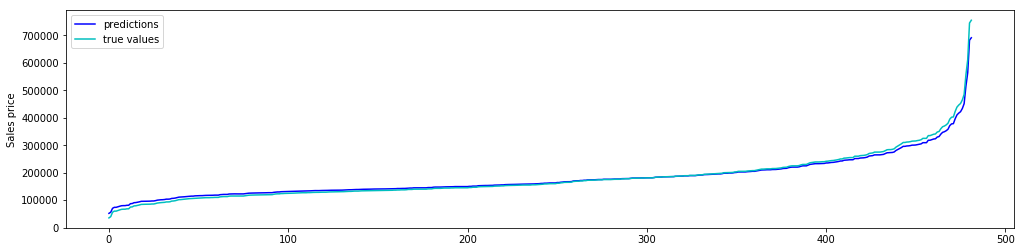

Model: KNeighbors


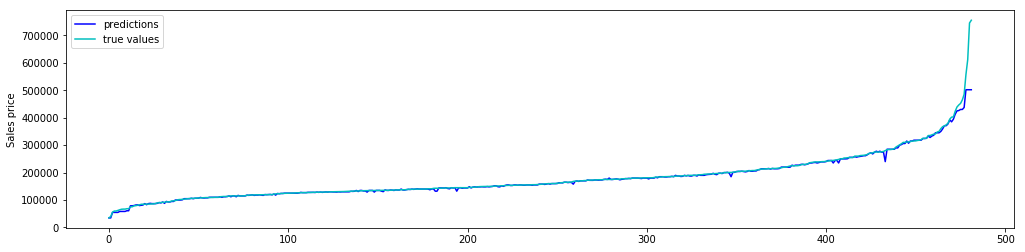

In [225]:
def displayGraphTrueVsPred2(name,y_pre,Y_test):
    plt.rcParams["figure.figsize"] = (17,4)

    print("Model: {}".format(name))

    preds_df=pd.DataFrame(data=y_pre,columns=["predictions"])
    preds_df["true values"]=Y_test.SalePrice.values
    preds_df.sort_values(by="true values",inplace=True)
    preds_df.reset_index(drop=True,inplace=True)


    line1, = plt.plot(preds_df["predictions"], 'b')
    line2, = plt.plot(preds_df["true values"], 'c')
    plt.legend(handler_map={line1: HandlerLine2D(numpoints=1)})
    plt.ylabel('Sales price')

    plt.show()

    
displayGraphTrueVsPred2(containers[7][0],containers[7][2],Y_test)
displayGraphTrueVsPred2(containers[2][0],containers[2][2],Y_test)

## Conclusion

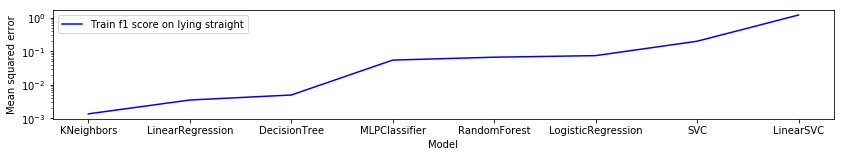

Model: LinearRegression


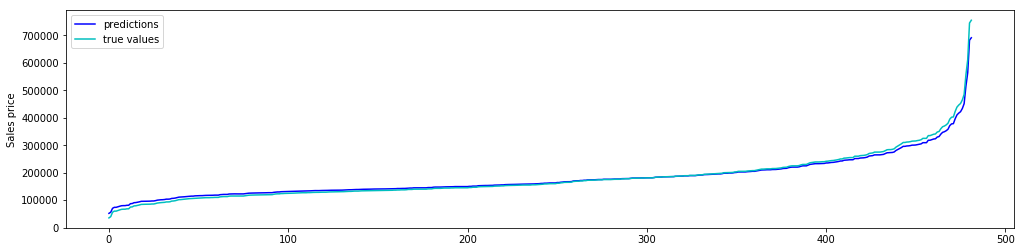

Model: KNeighbors


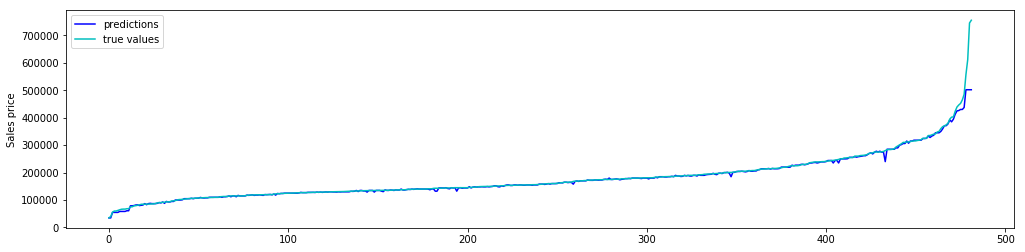

In [227]:

displayErrGraphOnAllAlgorithms(containers)
displayGraphTrueVsPred2(containers[7][0],containers[7][2],Y_test)
displayGraphTrueVsPred2(containers[2][0],containers[2][2],Y_test)

Jeremie: k neighbors has higher accuracy but I'm afraid it would fail to generalize well, especially on the top sales prices. still need to include categorical labels, but would be tempted to go for linear regression instead